<a href="https://colab.research.google.com/github/Ashok401/AIML_BootCamp/blob/main/Capstone/Capstone_Experiments_Prompt_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Experiment with Various AI Models and Prompt Engineering

- Conduct experiments with different language learning models (LLMs) using prompt engineering and data from the “top100_wordcounts” dataset to identify the model that produces the most effective results.
- Observations:
  - All LLMs performed satisfactorily, but Claude Sonnet 4, developed by Anthropic, demonstrated superior performance compared to the others.
  - Based on my analysis of this data, Claude accurately identified the top 10 issues in the correct order.


Note: This observation was made on December 19, 2025.








In [ ]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from openai import OpenAI
from google.colab import userdata

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multioutput import MultiOutputClassifier



Prompt engineering: Top 10 topics from ChatGPT using ‘Top 100 reviews’

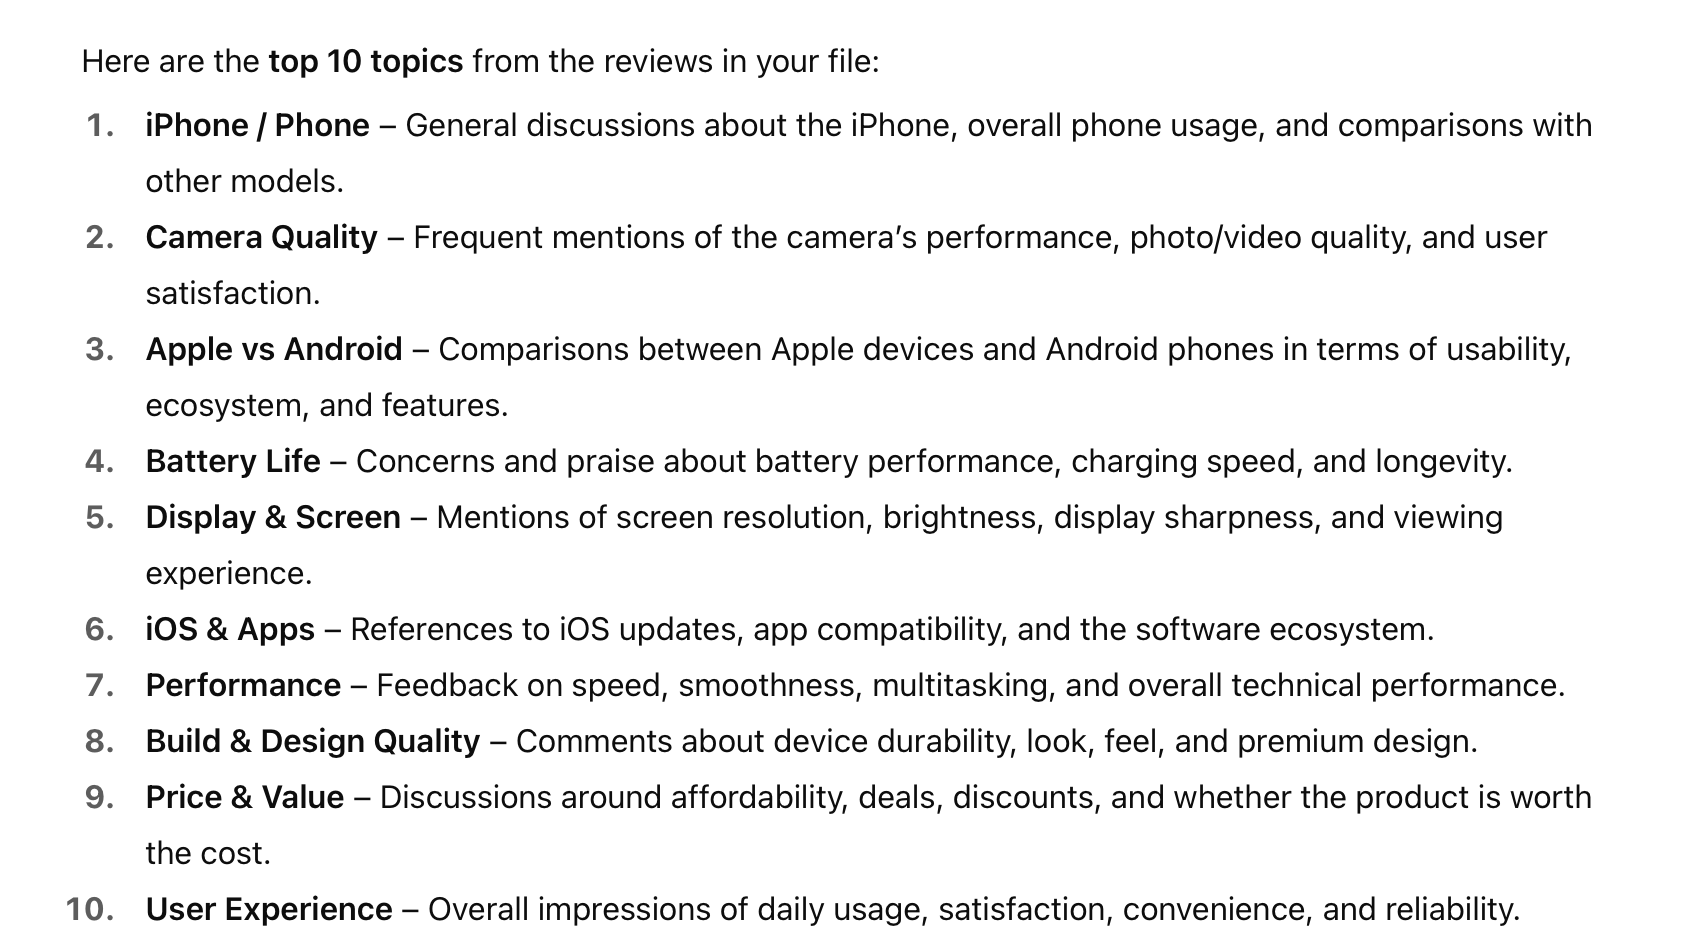

prompt = f"""
Extract the top 10 topics discussed in the following text. Focus on key themes, subjects, or recurring ideas.
Return the result as a numbered list with a short description for each topic.
Text:
{input_text} is from 'top100_wordcounts'
"""

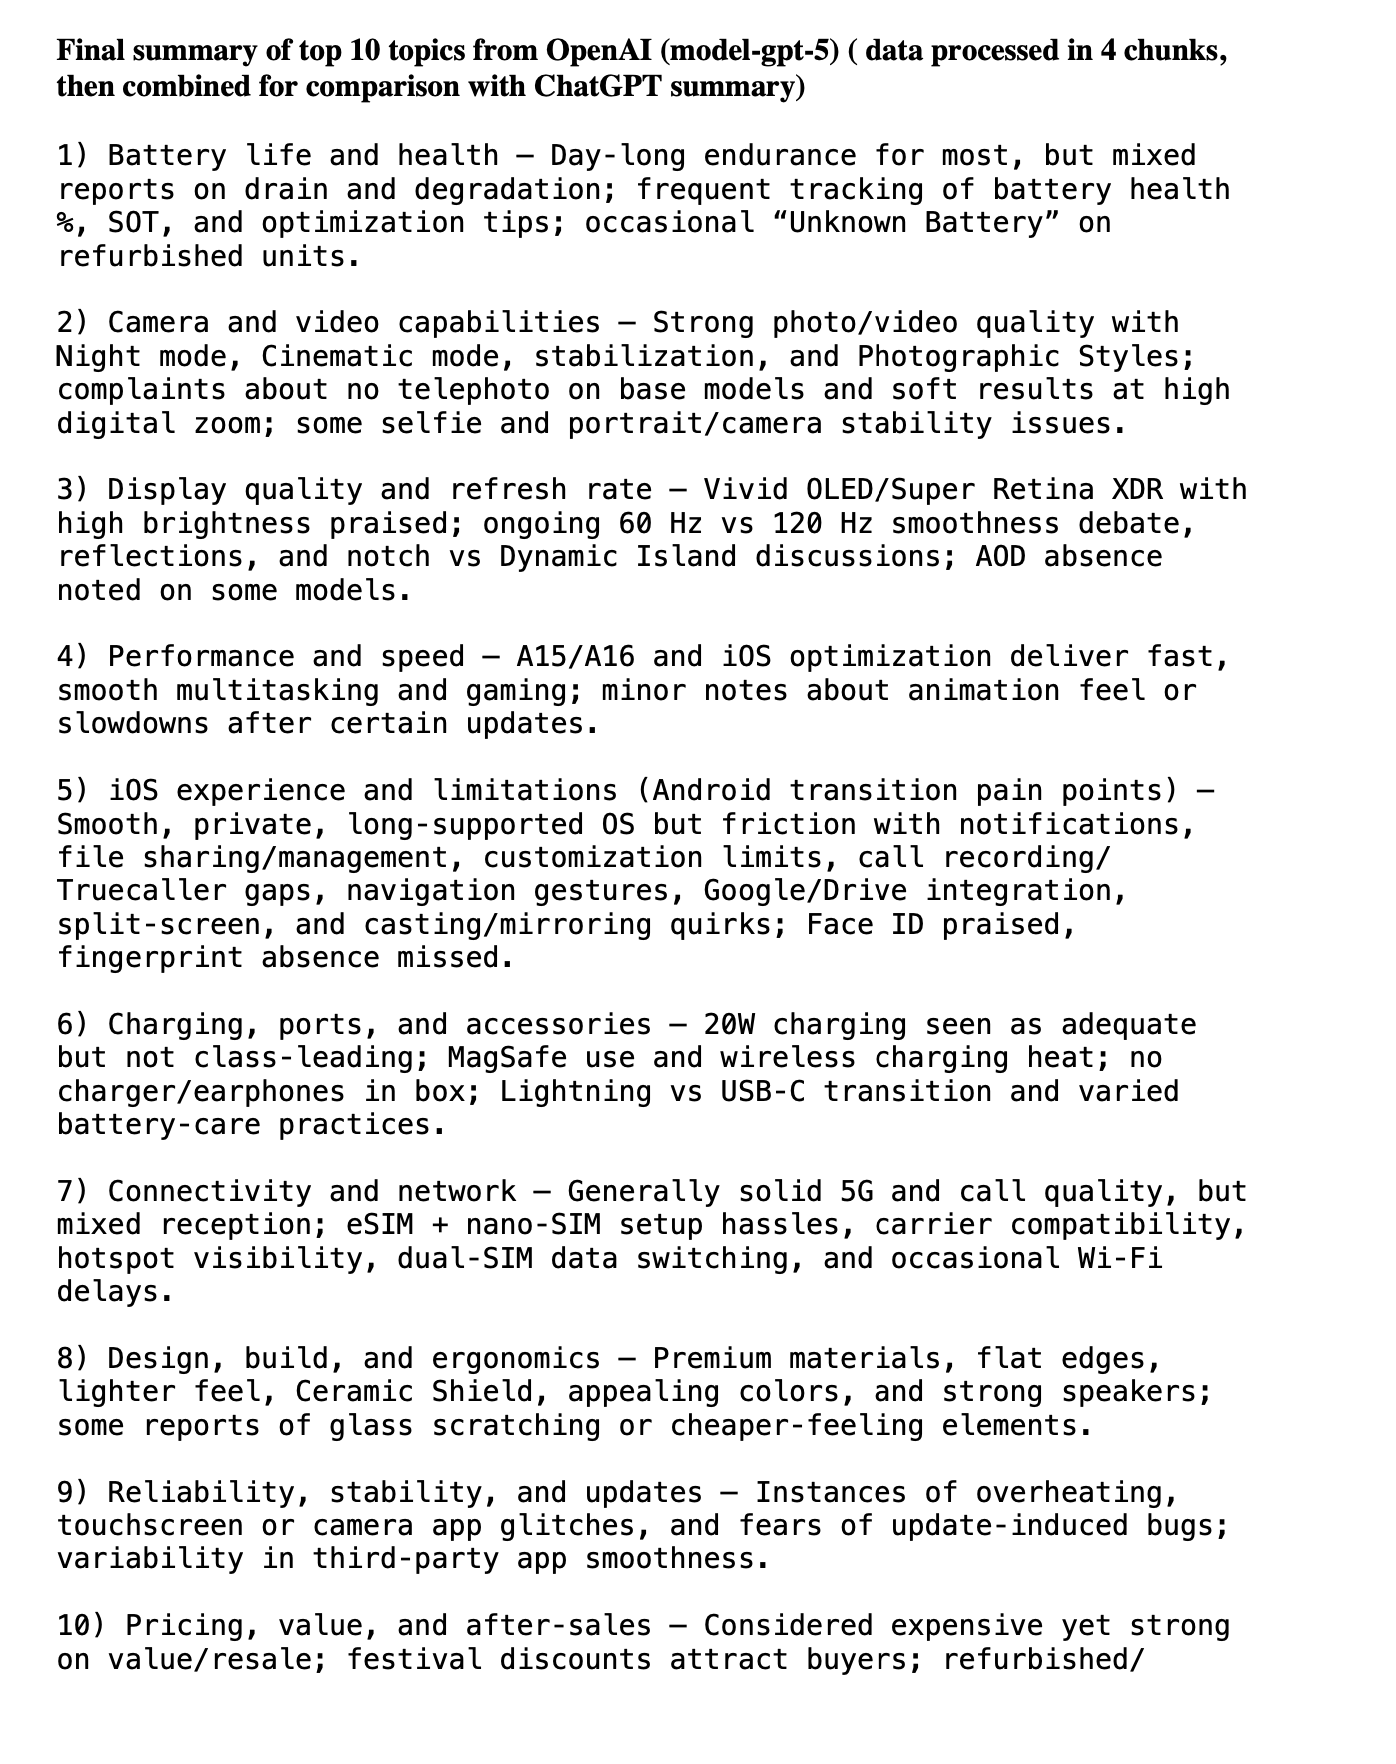

In [ ]:
# Load data frame saved in sentiment analysis - to use in promt engineering
# Note that you need to upload 'df_sa.csv', 'sorted_df_sa.csv' and 'top100_200_wordcounts.csv' to Google collab to continue
# these were generate from Capstone_iPhone_Sentiment_Analysis.ipynb
df = pd.read_csv('df_sa.csv')
sorted_df = pd.read_csv('sorted_df_sa.csv')

### Deep dive camera and battery reviews

In [ ]:
# Add more features - camera, battery, network, display reviews deepdive.
df['camera'] = df['review'].apply(lambda x: 1 if 'camera' in x.lower() else 0)
df['battery'] = df['review'].apply(lambda x: 1 if 'battery' in x.lower() else 0)
df['network'] = df['review'].apply(lambda x: 1 if 'network' in x.lower() else 0)
df['display'] = df['review'].apply(lambda x: 1 if 'display' in x.lower() else 0)

print(f"Camera: {(df['camera'] == 1).sum()}")
print(f"Battery: {(df['battery'] == 1).sum()}")
print(f"Network: {(df['network'] == 1).sum()}")
print(f"Display: {(df['display'] == 1).sum()}")


Camera: 479
Battery: 586
Network: 35
Display: 170


In [ ]:
# Deep dive into camera reviews
df['word_count_camera'] = df[df['camera']==1]['review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
# Add feature for  Front camera reviews
df['front_camera'] = df[df['camera']==1]['review'].apply(lambda x: 1 if ('front camera' in x.lower() or 'selfie' in x.lower()) else 0)
# Add feature for rear camera reviews
df['rear_camera'] = df[df['camera']==1]['review'].apply(lambda x: 1 if ('rear camera' in x.lower() or 'back camera' in x.lower()) else 0)
sorted_df_camera = df[df['word_count_camera']>0].sort_values(by='word_count_camera', ascending=False)

print(f"Deep dive into camera review:\n")
cleaned_df_camera = sorted_df_camera.drop_duplicates(subset='review')
print(cleaned_df_camera[['review']].head())
cleaned_df_camera['review'].to_csv('sorted_df_camera.csv', index=False)
print(f"Front camera: {(df['front_camera'] == 1).sum()}")
print(f"Rear camera: {(df['rear_camera'] == 1).sum()}")


Deep dive into camera review:

                                                 review
107   Review after 1 week of usage Got it for 65K on...
864   iPhone XR to iPhone 15 Just made the transitio...
1074  Use an Iphone for a month before planning to b...
1946  feel good yet(6 month) IOS 17.5 (current versi...
427   The iPhone 13 is the new benchmark for flagshi...
Front camera: 31
Rear camera: 16


prompt = f"""
Extract the top 10 topics discussed in the following text.
Focus on only on Camera quality realted topics.
Return the result as a numbered list with a short description for each topic.
Text:
{input_text} *is from "cleaned_df_camera"*
"""



1) Overall photo quality and color accuracy: Repeatedly praised for sharp detail and true-to-life colors with pleasing, natural skin tones; a few users found images occasionally oversaturated (especially on the front camera).

2) Low-light/Night mode performance: Often rated very good to excellent, with clearer, brighter night photos than older models; however, some users reported noise, softness, or “night photography sucks” in tougher scenes, especially with ultra‑wide and selfies.

3) Video quality and stabilization: A standout strength—stable, smooth footage with excellent detail; Cinematic mode and Dolby Vision HDR are frequently praised, and many call iPhone video best-in-class.

4) Portrait mode results and issues: Generally strong subject separation and pleasing bokeh; highlights include auto‑portrait detection. A few users saw app crashes or warmth/lag when shooting multiple portraits.

5) Selfie/front camera quality: Mixed feedback—some call it very good with accurate tones, others find it average or unflattering (showing blemishes, odd skin tones), and a few reported defective/nonworking front cameras.

6) Ultra‑wide lens performance and consistency: Good field of view and dynamic range consistency when switching lenses; performance drops in low light with softer detail and more noise compared to the main camera.

7) Zoom and telephoto limitations: Lack of a dedicated telephoto lens on non‑Pro models is a common complaint; digital zoom (e.g., 5x) is frequently described as soft or “not good,” and optical zoom options are limited.

8) Focus and close‑up/macro capability: Reports of autofocus struggling with small text or very close subjects; macro photography isn’t supported on base models, leading to soft or unfocused close‑ups for some use cases.

9) Lens flare/glare and artifacts: Noted lens flare/ghosting around point light sources at night; several users called this a recurring iPhone issue affecting image quality in certain lighting.

10) Reliability and thermal impact on camera: A subset experienced camera defects (shaking/buzzing, red line artifacts, “unknown” camera part warnings), app crashes, or heating near the camera during use—issues that can degrade image/video quality or stability.


Continue promt eng on front camera reviews
1) Skin-tone accuracy in selfies
- Mixed feedback: some praise true-to-life facial tones, while others report inaccurate tones that look unflattering.

2) High detail vs lack of “beauty” smoothing
- Many note the selfie cam captures every blemish and can make faces look harsher; fewer built‑in beautification options than many Android phones.

3) Low‑light/indoor selfie performance
- Frequently cited as weak: indoor/low‑light selfies can be noisy or blurry; a few users say it’s acceptable, but many want software improvements.

4) Color cast and white balance in selfies
- Reports of yellowish/selfie images and inconsistent exposure/lighting on faces in certain conditions.

5) Overall selfie quality vs Android
- Several Android switchers feel Android phones (even cheaper ones) produce more flattering selfies; others are happy with iPhone selfies.

6) Portrait selfies (quality and reliability)
- When it works, edge detection/portrait selfies are liked; a few users mention instability/crashes in Portrait mode (impacting selfie use cases).

7) Front camera expectations vs price/brand
- Some find the selfie camera “average” or “not up to iPhone standards” for the price; others say selfies are “flagship-level.”

8) Positive experiences with selfies
- A notable set of reviews say “selfies have never looked this good,” highlighting sharpness and pleasing skin tones in good light.

9) Year‑over‑year changes to the selfie camera
- Perception that iPhone 13 and 14 front cameras feel very similar; no dramatic upgrade noted by most users.

10) Front camera defects in refurbished units
- Multiple reports of non‑working selfie cameras, black lines in selfies, or “non‑genuine” camera parts flagged by Apple diagnostics.


Continue promt eng on rear camera reviews
1) Video quality and stabilization
- Widely praised rear-camera video with smooth stabilization. Features like Dolby Vision HDR, Cinematic mode (focus rack), Action mode, and gimbal-like steadiness are called best-in-class.

2) Low-light/night performance
- Night mode on the rear camera is generally strong with detailed, clean shots; some users still report noise and softness in very dark scenes.

3) Color accuracy and dynamic range
- Rear-camera photos are noted for true-to-life colors and balanced dynamic range; consistency when switching between wide and ultra‑wide is highlighted.

4) Main sensor resolution and detail (48MP vs 12MP)
- The 48MP main camera (iPhone 15) brings noticeably higher detail and crop flexibility; older 12MP sensors (iPhone 13/14) still produce sharp, reliable results.

5) Ultra‑wide lens performance
- 0.5x ultra‑wide captures expansive scenes and works well in daylight; quality drops in low light with more noise/softness than the main lens.

6) Zoom and telephoto limitations
- Base models lack a telephoto lens. Optical reach is limited and digital zoom (e.g., 5x) often looks soft or pixelated; macro/close‑focus capability is also limited.

7) Portrait mode (rear camera)
- Rear portraits have pleasing bokeh and separation; auto‑portrait detection is appreciated. A few users report app crashes or warming while shooting portraits.

8) Optical image stabilization for photos
- Sensor‑shift OIS on the rear camera helps keep photos sharp in low light and reduces blur from hand shake.

9) Lens flare/ghosting in night scenes
- Noted rear-camera issue: visible flare/ghosting around bright point lights at night, affecting both photos and videos.

10) Reliability and defects impacting rear-camera quality
- Some units reported autofocus failures, shaking/buzzing, overheating during camera use, portrait mode crashes, non‑genuine camera modules, lens scratches/cracks, coating peel, dust ingress, or post‑update flash issues.


In [ ]:
# Deep dive into battery reviews
df['word_count_battery'] = df[df['battery']==1]['review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
#Add feature battery drain due to network/5G
df['battery_drain_network'] = df[df['battery']==1]['review'].apply(lambda x: 1 if ('network' in x.lower() or '5g' in x.lower()) else 0)
sorted_df_battery = df[df['word_count_battery']>0].sort_values(by='word_count_battery', ascending=False)
print(f"Deep dive into battery review:\n")
cleaned_df_battery = sorted_df_battery.drop_duplicates(subset='review')
print(cleaned_df_battery[['review']].head())
cleaned_df_battery['review'].to_csv('sorted_df_battery.csv', index=False)


Deep dive into battery review:

                                                 review
1468  1st purchase was great! This one was not! I ha...
107   Review after 1 week of usage Got it for 65K on...
864   iPhone XR to iPhone 15 Just made the transitio...
1074  Use an Iphone for a month before planning to b...
1946  feel good yet(6 month) IOS 17.5 (current versi...


Continue Promt engineering on Battery reviews
1) Overall battery life/endurance
- Reports range from “1–2 days on light/moderate use” to “dies within hours” under heavier use; many say iPhone 13/14 last a full day, while some units (esp. renewed) drain unexpectedly fast.

2) Battery health on renewed/refurbished units
- Many cite initial health between 80–95% (some 100%, some as low as 82–86%); several note rapid health decline (e.g., 100% → mid‑80s within months) and expectations that >90% should be standard.

3) Charging speed and behavior
- 20W wired charging commonly mentioned; typical times reported ~1–1.5 hours from ~20% to ~80–90%. Compared to Android, charging feels slow; “Optimized Battery Charging” and trickle behavior near 100% noted. No charger in box is common.

4) Overheating tied to drain
- Heat during charging, camera use, gaming, hotspotting, and initial setup/indexing; wireless/MagSafe charging called out for extra heat. Some experienced shutdowns/boot loops until battery depleted.

5) iOS updates and battery impact
- iOS 16/17 updates frequently linked to increased drain or heating for some; others say it improves after the phone “learns” usage. Several users fear updating due to possible battery/display issues.

6) Battery‑saving practices shared by users
- Tips include: keep charge between ~20–80/95%, enable Optimized Charging, disable background app refresh and unnecessary location services, avoid wireless charging, turn off vibration, and manage 5G.

7) Network/5G effects on battery
- 5G and weak/variable signal are blamed for heavy drain; hotspot use can deplete in ~5 hours; dual 5G standby mentioned. Some toggle 5G off to save power.

8) Screen‑on time (SOT) outcomes
- Reported SOT varies widely: ~4.5–5 hours (mixed/heavy use) up to ~7–8 hours (lighter use). Usage pattern (camera, gaming, streaming) strongly affects results.

9) Battery service, warranty, and “Unknown Battery” flags
- “Unknown Battery” messages and low health prompt service visits; mixed experiences with seller/Apple support, including battery replacements, denial due to third‑party parts, and confusion over warranties/cycle counts.

10) Model‑to‑model battery comparisons
- iPhone 13 generally praised over 12; 14 often described as similar to 13 (some say slightly better/faster to charge); 15 commonly reported at ~1–1.5 days; mini criticized for poor endurance; Pro/Pro Max seen as better for battery longevity.


Continue promt eng on battery, Focus is only on iOS updates and battery impact realted topics

1) Post‑update battery drain (iOS 16/17) – Multiple users report worse battery life immediately after updating (notably iOS 16 and iOS 17/17.0.3), sometimes improving after a few days as the phone re‑indexes.

2) Heating after updates and during charging – Reports of overheating or getting very warm on iOS 17/17.0.3 (and occasionally after other updates), especially while charging or using the camera, which accelerates battery drain.

3) Update anxiety and auto‑update off – Several users fear iOS updates due to widely shared reports of battery drain, heating, or display issues; some keep auto‑updates disabled to avoid potential battery impacts.

4) Refurbished/renewed phones with low or rapidly falling battery health – Many renewed units arrive at 80–90% health, trigger “Unknown Battery” warnings, or drop health quickly (e.g., to mid‑80s in weeks), causing random shutdowns and return/warranty friction.

5) Idle/overnight drain variability – Mixed experiences from minimal (1–2%) to excessive (5–6% or more) overnight drain with no active use, suggesting background tasks, indexing, or configuration differences after updates.

6) Network features impacting battery (5G/hotspot) – 5G, frequent network changes, and hotspot usage significantly reduce battery life; some note hotspot draining a full charge in a few hours.

7) Optimized charging and 80% limit behavior – Users mention Optimized Battery Charging/80% limits and trickle charging to 100%; helps longevity but can confuse expectations about speed and “full” charges after updates.

8) Charging speed vs. heat trade‑offs – Typical results: ~50% in ~30 minutes with 20W, ~1–1.5 hours to full; wireless charging and fast charging can increase heat, which users link to faster battery wear.

9) Real‑world endurance and SOT spread – Reported screen‑on time ranges from ~4.5 to 8 hours; heavy camera/social/media days (post‑update or indexing) drain faster than “day‑plus” light‑use claims.

10) Battery/OS troubleshooting steps – Common remedies include backup → erase/restore, turning off background app refresh and some location services, disabling vibrations, waiting a few days post‑update for indexing to finish; results vary.


Continue Promt eng on battery, Focus is only Network/5G effects on battery impact realted topics

1) 5G drains battery faster than 4G
- Several users report heavy drain when 5G is enabled (e.g., “5G consumes battery a lot… need to charge 3 times a day”), highlighting higher radio power use on 5G versus LTE.

2) Frequent network changes/handoffs accelerate drain and heat
- While traveling or in fluctuating coverage, users saw rapid battery drop (“hardly 3–4 hours if your network changes frequently”) and noticeable heating.

3) Mobile hotspot/tethering is a major battery hog
- Using the phone as a hotspot can deplete the battery quickly (“if you use hotspot then it will be drained in 5 hours”), reflecting high sustained modem and Wi‑Fi activity.

4) Weak cellular reception increases power draw
- Reports of poorer reception (e.g., “one bar” where Android had full LTE) imply the phone boosts transmit power longer, which typically reduces battery life.

5) Missing/limited carrier aggregation (4G+) may hurt efficiency
- “Not getting 4G+ on Airtel” suggests fewer aggregated bands and longer radio active time, which can indirectly worsen battery endurance during data use.

6) Dual 5G standby and dual SIM/eSIM can raise idle drain
- Users note dual 5G standby (Vi/Jio) and dual-SIM use; running two active radios/SIMs can increase background modem activity and standby battery usage.

7) iPhone 13 improved 5G endurance over iPhone 12
- One review notes iPhone 13’s longer battery life compared to iPhone 12’s “underwhelming” endurance for a 5G phone, showing generational efficiency gains on 5G.

8) Overnight idle drain potentially tied to network behavior
- Multiple complaints of unexplained overnight drops (e.g., 5–6% vs 1–2% on another device) hint at background network scans, weak-signal retries, or modem tasks.

9) Wi‑Fi/hotspot connection quirks can prolong radio scanning
- “Takes a lot of time to get detected by devices when hotspot is on” and “Wi‑Fi takes a lot of time to connect” can keep radios in active scan states, costing battery.

10) Carrier/eSIM provisioning issues can keep radios active
- Activation/lock/eSIM troubles (e.g., Straight Talk eSIM not working, wrong carrier lock) can trigger repeated network registration attempts, impacting standby battery until resolved.


In [ ]:
# Multi classification using LogisticRegression
# predict a review is related to  camera/batter/display using LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df['review'], df[['camera', 'battery', 'display']], test_size=0.2, random_state=42)
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultiOutputClassifier(LogisticRegression(solver='liblinear'))) # Use MultiOutputClassifier
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# The following metrics need to be calculated for each target variable separately
# since it's a multi-label classification problem.
# We can't use a single confusion matrix or classification report for all targets at once.

# To evaluate, you can loop through each target:
for i, col in enumerate(['camera', 'battery', 'display']):
    print(f"Metrics for '{col}':")
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{classification_report(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}\n")


Metrics for 'camera':
Confusion Matrix:
[[444   0]
 [ 36  73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       444
           1       1.00      0.67      0.80       109

    accuracy                           0.93       553
   macro avg       0.96      0.83      0.88       553
weighted avg       0.94      0.93      0.93       553

Accuracy: 0.9349005424954792

Metrics for 'battery':
Confusion Matrix:
[[438   0]
 [ 18  97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       438
           1       1.00      0.84      0.92       115

    accuracy                           0.97       553
   macro avg       0.98      0.92      0.95       553
weighted avg       0.97      0.97      0.97       553

Accuracy: 0.9674502712477396

Metrics for 'display':
Confusion Matrix:
[[526   0]
 [ 20   7]]
Classification Report:
              precision   

#Experiment with various AI models

Task :Experiment with different LLMs using the data available from top100_wordcounts to determine which model yields superior results.

Observation: I’ve noticed that all LLMs are performing quite well. However, Claude Sonnet 4, created by Anthropic, is outperforming the others. I arrived at this conclusion based on my experience with this data. Notably, Claude identified the top 10 issues in the correct order.

Note this observation made on December 19, 2025.

prompt = f"""

Extract the top 10 topics discussed in the following text. Focus on key

themes, subjects, or recurring ideas.

Return the result as a numbered list with a short description for each topic.

Text:

"""

{input_text} is from "top100_wordcounts"

"""

###AI Model : Gemeni 3 (Gemini 1.5 Flash)

### Top 10 Topics from iPhone Reviews

1. **Battery Health and Longevity**: A major recurring theme where users monitor "Battery Health" percentages and report issues with the phone dying quickly or not holding a charge as expected.
2. **Renewed vs. New Condition**: Many reviews compare the experience of buying "Amazon Renewed" (refurbished) devices against buying brand new, focusing on cosmetic wear and functional reliability.
3. **Camera Performance**: Users frequently highlight the quality of photo reproduction, night mode, and video capabilities as a primary reason for their satisfaction.
4. **Transition from Android to iOS**: Several reviews detail the "lifelong Android user" perspective, discussing the learning curve, file management differences, and software ecosystem shifts.
5. **Charging and Cable Issues**: A specific focus on out-of-the-box failures, such as faulty lightning/USB cables and the necessity of purchasing MagSafe chargers separately.
6. **Ecosystem Integration**: Descriptions of how the iPhone interacts with other Apple products like MacBooks, including features like AirPlay, Handoff, and shared calls.
7. **Display and Refresh Rate**: Discussions regarding the smoothness of the screen, the presence of the "notch," and how Apple’s software optimization compensates for a 60Hz panel.
8. **Customer Service and Returns**: High focus on the difficulty or ease of the return process, dealing with Apple Service Centers, and the financial logistics of swapping a faulty device.
9. **Build Quality and Aesthetics**: Topics covering the physical feel of the phone, color choices (like Product Red or Midnight), and durability against drops or scratches.
10. **Software & UI Limitations**: Mixed feedback on iOS-specific features like Siri performance, the notification panel, and the lack of a custom keypad compared to Android.



### AI Model : GPT-5.2 (a model in OpenAI’s GPT-5 family)

### Top 10 Topics Discussed

1. **Overall Product Quality & Satisfaction**  
   Users discuss general satisfaction, build quality, reliability, and whether the product meets expectations over time.

2. **Performance & Speed**  
   Focus on responsiveness, smooth operation, multitasking capability, and lag during daily usage.

3. **Battery Life & Charging**  
   Mentions of battery backup, screen-on time, charging speed, and long-term battery health.

4. **Camera Quality (Photos & Video)**  
   Discussions around photo clarity, video quality, low-light performance, and stabilization.

5. **Display & Design**  
   Feedback on screen quality, brightness, color accuracy, size, weight, and overall aesthetics.

6. **Value for Money & Pricing**  
   Evaluation of price justification, discounts, offers, and comparison with similarly priced alternatives.

7. **Comparison with Previous Models or Competitors**  
   Users compare upgrades, missing features, and advantages over older models or competing brands.

8. **Software Experience & Updates**  
   Topics include OS stability, user interface, new features, bugs, and software update support.

9. **Customer Service, Warranty & Replacement Issues**  
   Experiences with service centers, warranty claims, returns, and replacements.

10. **Delivery, Packaging & Authenticity**  
     Comments on delivery speed, packaging quality, seller reliability, and product authenticity.


###AI Model: Claude Sonnet 4, created by Anthropic
Based on the iPhone review data provided, here are the **top 10 topics** discussed:

### Top 10 Topics in iPhone Reviews

1. **Battery Life & Charging Performance**
   - Discussion of daily battery endurance, charging speed, battery health degradation over time, and comparisons between models

2. **Camera Quality & Features**
   - Photo and video quality, low-light performance, portrait mode, cinematic mode, selfie camera issues, and comparisons with Android devices

3. **Android to iOS Transition Experience**
   - Challenges switching from Android, missing features, learning curve, UI differences, and adaptation to the Apple ecosystem

4. **Display Quality & Refresh Rate**
   - Screen brightness, OLED quality, 60Hz vs 120Hz debate, notch design, and viewing experience

5. **Performance & Processing Power**
   - A15/A16 Bionic chip performance, smoothness, gaming capability, multitasking, and speed compared to Android devices

6. **Price & Value for Money**
   - Cost concerns, whether features justify the price, comparisons with Android alternatives, and resale value

7. **iOS Limitations & Missing Features**
   - Lack of customization, file management issues, no fingerprint scanner, notification system problems, and missing Android features like call recording

8. **Build Quality & Design**
   - Premium feel, durability, color options, weight, size, IP68 rating, and physical condition of renewed/refurbished devices

9. **Renewed/Refurbished Product Experience**
   - Battery health percentages, cosmetic condition, packaging quality, seller reliability, and return/replacement processes

10. **Apple Ecosystem Integration & Compatibility**
    - Connectivity with Mac/iPad/Apple Watch, AirDrop, iCloud storage, eSIM setup, USB-C vs Lightning, and compatibility with non-Apple accessories

###AI Model: Perplexity’s default Sonar-based model
Top 10 Topics
1. **iPhone performance and processor power** – Repeated emphasis on the A15/A16 Bionic chips, fast app launches, smooth multitasking, and overall speed relative to Android phones and high RAM devices.[1]

2. **Battery life and charging behavior** – Frequent discussion of daily endurance, fast drain or phenomenal backup, charging speed, battery health percentages, and anxiety about long‑term battery degradation.[1]

3. **Camera quality and photography features** – Detailed comments on photo and video clarity, low‑light performance, Night mode, Cinematic mode, color accuracy, skin tones, and comparison of 12 MP iPhone cameras to higher‑MP Android cameras.[1]

4. **Display quality and refresh experience** – Mentions of Super Retina XDR/OLED screens, brightness, color vibrancy, viewing in sunlight, 60 Hz vs 120/144 Hz, the notch or Dynamic Island, and overall smooth UI feel.[1]

5. **iOS ecosystem and user experience **– Discussion of iOS smoothness, widgets, app optimization (including Google apps), privacy features, Focus modes, FaceTime, and tight integration with other Apple devices like MacBook and AirPlay.[1]

6. **Switching from Android to iOS** – Many reviewers narrate transition experiences, missing Android features or file management, adapting to iOS restrictions, and differences in app behavior and productivity, especially with Windows PCs.[1]

7. **Design, build quality**, and in‑hand feel – Recurrent praise for premium materials, flat edges, compact size, Ceramic Shield, IP68 resistance, and how the phone feels and looks, including colors and cosmetic condition on renewed units.[1]

8. **Price, value, and resale/warranty concerns** – Comments on phones being overpriced or “worth every penny,” use of sales/exchange offers, extended warranty costs, low trade‑in values, and perceptions of long‑term value or “scam.”[1]

9. **Reliability issues and defects** – Reports of green‑screen problems, network issues, glitchy touchscreens, rapid battery health decline, heating during updates, and worries about needing repairs after software updates or post‑warranty failures.[1]

10. **Accessories, storage, and app ecosystem costs** – Mentions of needing to buy chargers and covers, high accessory prices, limited free iCloud storage, paying for apps or services (e.g., Apple Music, Truecaller), and availability or quality of certain apps on iOS compared with Android.[1]
